In [13]:
#扩大样本量
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# @Time    :
# @Author  :
# @File    :
# @Project :
# @Description: 对图片数据集进行操作
#               项目要求：对给定目录下的三个子文件夹进行处理并保存在增强数据集子文件夹下
#
 
import os
from PIL import Image
 
# 工作路径
working_path = r"E:\Train picture"
 
# runing
##############################################################################################################
 
folders = os.listdir(working_path)
 
def pro_pictures(image_path, suffix, new_dir): 

    
    """
    对给定图片进行数据增强处理
    :param image_path: 图片所在路径
    :param suffix: 序列图片后缀填充
    :param new_dir: 存储的新路径
    :return: 空值
    """
    rename_num = 1  # 命名的起始编号
 
    parent = image_path  # 图片路径
    fill_rename_num = 6  # 填充的位数
    suffix = suffix  # 标志填充字符
 
    filenames = os.listdir(image_path)
    save_image = working_path + r"\\处理数据集\\"
 
    save_image = save_image + new_dir
    if not os.path.exists(save_image):
        os.makedirs(save_image)
 
    for filename in filenames:
        # 获取当前路径下的当前文件
        current_path = os.path.join(parent, filename)
        picture_type = os.path.splitext(image_path + r"\\" + filename)
        new_image = Image.open(current_path)
        zero_fill = str(rename_num).zfill(fill_rename_num)  # 数字填充
        image_rename = save_image + f'\\{zero_fill}' + suffix + picture_type[1]  # 规范化重命名
        new_image.save(image_rename)
        print(rename_num, end="  ")
        rename_num = rename_num + 1
    print(r"\n原图复制完成！")
 
    for filename in filenames:
        new_image = Image.open(current_path)
        current_path = os.path.join(parent, filename)
        out = new_image.transpose(Image.FLIP_LEFT_RIGHT)
        zero_fill = str(rename_num).zfill(fill_rename_num)
        image_rename = save_image + f'\\{zero_fill}' + suffix + picture_type[1]
        out.save(image_rename)
        print(rename_num, end="  ")
        rename_num = rename_num + 1
    print(r"\n水平翻转完成！")
 
    for filename in filenames:
        new_image = Image.open(current_path)
        current_path = os.path.join(parent, filename)
        out = new_image.transpose(Image.FLIP_TOP_BOTTOM)
        zero_fill = str(rename_num).zfill(fill_rename_num)
        image_rename = save_image + f'\\{zero_fill}' + suffix + picture_type[1]
        out.save(image_rename)
        print(rename_num, end="  ")
        rename_num = rename_num + 1
    print(r"\n垂直翻转完成！")
 
    for filename in filenames:
        new_image = Image.open(current_path)
        current_path = os.path.join(parent, filename)
        tmp = new_image.transpose(Image.FLIP_LEFT_RIGHT)
        out = tmp.transpose(Image.FLIP_TOP_BOTTOM)
        zero_fill = str(rename_num).zfill(fill_rename_num)
        image_rename = save_image + f'\\{zero_fill}' + suffix + picture_type[1]
        out.save(image_rename)
        print(rename_num, end="  ")
        rename_num = rename_num + 1
    print(r"\n水平和垂直翻转完成！")
    return
 
for folder in folders: 
    image_path = working_path + r"\\" + folder
    if "jpg原图" == folder:
        pro_pictures(image_path, "", "jpg原图")
    elif "png填充" == folder:
        pro_pictures(image_path, "_L", "png填充")
    elif "png原图" == folder:
        pro_pictures(image_path, "", "png原图")
print("该文件夹任务处理完成！") 

该文件夹任务处理完成！


In [18]:
from PIL import Image, ImageEnhance
import numpy as np
import imutils
import os
 
# 1 尺寸：8
# 2 旋转 9
# 3 镜像 3
# 4 平移 9
# 5 亮度不变 9
# 6 色度不变 7
# 7 对比度不变 7
# 8 锐度 7
 
#尺寸调整
def ImgResize(Img,ScaleFactor):
    ImgSize = Img.size #获得图像原始尺寸
    NewSize = [int(ImgSize[0]*ScaleFactor),int(ImgSize[1]*ScaleFactor)]  #获得图像新尺寸，保持长宽比
    Img = Img.resize(NewSize)     #利用PIL的函数进行图像resize，类似matlab的imresize函数
    return Img
def ImgResizeTo(Img,NewSize):
    Img = Img.resize(NewSize)     #利用PIL的函数进行图像resize，类似matlab的imresize函数
    return Img
 
#旋转
def ImgRotate(Img,Degree):
    return Img.rotate(Degree) #利用PIL的函数进行图像旋转，类似matlab imrotate函数
#利用PIL的函数进行水平以及上下镜像
def ImgLRMirror(Img):
    return Img.transpose(Image.FLIP_LEFT_RIGHT)
def ImgTBMirror(Img):
    return Img.transpose(Image.FLIP_TOP_BOTTOM)
# 亮度,增强因子为1.0是原始图像
def BrightEnchance(Img, factor):
    enh_bri = ImageEnhance.Brightness(Img)
    image_brightened = enh_bri.enhance(factor)
    return image_brightened
 
# 色度,增强因子为1.0是原始图像
def ColorEnchance(Img, factor):
    enh_col = ImageEnhance.Color(Img)
    image_colored = enh_col.enhance(factor)
    return image_colored
 
#对比度，增强因子为1.0是原始图片
def ContrastEnchance(Img, factor):
    enh_con = ImageEnhance.Contrast(Img)
    image_contrasted = enh_con.enhance(factor)
    return image_contrasted
 
# 锐度，增强因子为1.0是原始图片
def SharpEnchance(Img, factor):
    enh_sha = ImageEnhance.Sharpness(Img)
    image_sharped = enh_sha.enhance(factor)
    return image_sharped
 
# data_path = '/home/xiqi/PycharmProjects/FBMS/Dataset/Trainingset/'
data_path = 'E:/Train picture/'
video_list = os.listdir(data_path)
 
save_path = 'E:/Train picture/augmentation_images/'
if not os.path.exists(save_path):  # 文件夹不存在，则创建
    os.mkdir(save_path)

img_list = os.listdir(data_path)
for j in range(0, len(img_list)):
    print(j)
    img_path = os.path.join(data_path, img_list[j])  # 图片文件
    if os.path.isfile(img_path):
        Img = Image.open(img_path)
        # 1 尺寸
        scale_img1 = ImgResize(Img,0.2)
        scale_img2 = ImgResize(Img,0.4)
        scale_img3 = ImgResize(Img,0.6)
        scale_img4 = ImgResize(Img,0.8)
        scale_img5 = ImgResize(Img,1)
        scale_img6 = ImgResize(Img, 1.2)
        scale_img7 = ImgResize(Img, 1.4)
        scale_img8 = ImgResize(Img, 1.5)
        save_scale_path1 = os.path.join(save_path, 'scale_img1_'+img_list[j])
        save_scale_path2 = os.path.join(save_path, 'scale_img2_'+img_list[j])
        save_scale_path3 = os.path.join(save_path, 'scale_img3_'+img_list[j])
        save_scale_path4 = os.path.join(save_path, 'scale_img4_'+img_list[j])
        save_scale_path5 = os.path.join(save_path, 'scale_img5_'+img_list[j])
        save_scale_path6 = os.path.join(save_path, 'scale_img6_'+img_list[j])
        save_scale_path7 = os.path.join(save_path, 'scale_img7_'+img_list[j])
        save_scale_path8 = os.path.join(save_path, 'scale_img8_'+img_list[j])
        scale_img1.save(save_scale_path1)
        scale_img2.save(save_scale_path2)
        scale_img3.save(save_scale_path3)
        scale_img4.save(save_scale_path4)
        scale_img5.save(save_scale_path5)
        scale_img6.save(save_scale_path6)
        scale_img7.save(save_scale_path7)
        scale_img8.save(save_scale_path8)
 
        # 2 旋转
        rotate_img1 = ImgRotate(Img,10)
        rotate_img2 = ImgRotate(Img,30)
        rotate_img3 = ImgRotate(Img,45)
        rotate_img4 = ImgRotate(Img,90)
        rotate_img5 = Img
        rotate_img6 = ImgRotate(Img, 120)
        rotate_img7 = ImgRotate(Img, 135)
        rotate_img8 = ImgRotate(Img, 170)
        rotate_img9 = ImgRotate(Img, 180)
        save_rotate_path1 = os.path.join(save_path, 'rotate_img1_'+img_list[j])
        save_rotate_path2 = os.path.join(save_path, 'rotate_img2_'+img_list[j])
        save_rotate_path3 = os.path.join(save_path, 'rotate_img3_'+img_list[j])
        save_rotate_path4 = os.path.join(save_path, 'rotate_img4_'+img_list[j])
        save_rotate_path5 = os.path.join(save_path, 'rotate_img5_'+img_list[j])
        save_rotate_path6 = os.path.join(save_path, 'rotate_img6_'+img_list[j])
        save_rotate_path7 = os.path.join(save_path, 'rotate_img7_'+img_list[j])
        save_rotate_path8 = os.path.join(save_path, 'rotate_img8_'+img_list[j])
        save_rotate_path9 = os.path.join(save_path, 'rotate_img9_'+img_list[j])
        rotate_img1.save(save_rotate_path1)
        rotate_img2.save(save_rotate_path2)
        rotate_img3.save(save_rotate_path3)
        rotate_img4.save(save_rotate_path4)
        rotate_img5.save(save_rotate_path5)
        rotate_img6.save(save_rotate_path6)
        rotate_img7.save(save_rotate_path7)
        rotate_img8.save(save_rotate_path8)
        rotate_img9.save(save_rotate_path9)
 
        # 镜像
        mirror_img1 = ImgLRMirror(Img)
        mirror_img2 = ImgTBMirror(Img)
        mirror_img3 = Img
        save_mirror_path1 = os.path.join(save_path, 'mirror_img1_'+img_list[j])
        save_mirror_path2 = os.path.join(save_path, 'mirror_img2_'+img_list[j])
        save_mirror_path3 = os.path.join(save_path, 'mirror_img3_'+img_list[j])
        mirror_img1.save(save_mirror_path1)
        mirror_img2.save(save_mirror_path2)
        mirror_img3.save(save_mirror_path3)
 
        # 平移
        array_img = np.array(Img) # PIL.Image 转 numpy.array
        translation_img1 = imutils.translate(array_img, 60, 60)
        translation_img2 = imutils.translate(array_img, -60, 60)
        translation_img3 = imutils.translate(array_img, 60, -60)
        translation_img4 = imutils.translate(array_img, -60, -60)
        translation_img5 = array_img
        translation_img6 = imutils.translate(array_img, 30, 30)
        translation_img7 = imutils.translate(array_img, -30, 30)
        translation_img8 = imutils.translate(array_img, 30, -30)
        translation_img9 = imutils.translate(array_img, -30, -30)
        save_translation_path1 = os.path.join(save_path, 'translation_img1_'+img_list[j])
        save_translation_path2 = os.path.join(save_path, 'translation_img2_'+img_list[j])
        save_translation_path3 = os.path.join(save_path, 'translation_img3_'+img_list[j])
        save_translation_path4 = os.path.join(save_path, 'translation_img4_'+img_list[j])
        save_translation_path5 = os.path.join(save_path, 'translation_img5_'+img_list[j])
        save_translation_path6 = os.path.join(save_path, 'translation_img6_'+img_list[j])
        save_translation_path7 = os.path.join(save_path, 'translation_img7__'+img_list[j])
        save_translation_path8 = os.path.join(save_path, 'translation_img8_'+img_list[j])
        save_translation_path9 = os.path.join(save_path, 'translation_img9_'+img_list[j])
        translation_img1 = Image.fromarray(translation_img1)
        translation_img2 = Image.fromarray(translation_img2)
        translation_img3 = Image.fromarray(translation_img3)
        translation_img4 = Image.fromarray(translation_img4)
        translation_img5 = Image.fromarray(translation_img5)
        translation_img6 = Image.fromarray(translation_img6)
        translation_img7 = Image.fromarray(translation_img7)
        translation_img8 = Image.fromarray(translation_img8)
        translation_img9 = Image.fromarray(translation_img9)
        translation_img1.save(save_translation_path1)
        translation_img2.save(save_translation_path2)
        translation_img3.save(save_translation_path3)
        translation_img4.save(save_translation_path4)
        translation_img5.save(save_translation_path5)
        translation_img6.save(save_translation_path6)
        translation_img7.save(save_translation_path7)
        translation_img8.save(save_translation_path8)
        translation_img9.save(save_translation_path9)
 
 
        # 以下只对原图操作，亮度,增强因子为0.0将产生黑色图像；为1.0将保持原始图像
        bright_img1 = BrightEnchance(Img, 0.3)
        bright_img2 = BrightEnchance(Img, 0.4)
        bright_img3 = BrightEnchance(Img, 0.5)
        bright_img4 = BrightEnchance(Img, 0.6)
        bright_img5 = BrightEnchance(Img, 0.7)
        bright_img6 = BrightEnchance(Img, 0.8)
        bright_img7 = BrightEnchance(Img, 0.9)
        bright_img8 = BrightEnchance(Img, 0.9)
        bright_img9 = Img
        save_bright_path1 = os.path.join(save_path, 'bright_img1_'+img_list[j])
        save_bright_path2 = os.path.join(save_path, 'bright_img2_'+img_list[j])
        save_bright_path3 = os.path.join(save_path, 'bright_img3_'+img_list[j])
        save_bright_path4 = os.path.join(save_path, 'bright_img4_'+img_list[j])
        save_bright_path5 = os.path.join(save_path, 'bright_img5_'+img_list[j])
        save_bright_path6 = os.path.join(save_path, 'bright_img6_'+img_list[j])
        save_bright_path7 = os.path.join(save_path, 'bright_img7__'+img_list[j])
        save_bright_path8 = os.path.join(save_path, 'bright_img8_'+img_list[j])
        save_bright_path9 = os.path.join(save_path, 'bright_img9_'+img_list[j])
        bright_img1.save(save_bright_path1)
        bright_img2.save(save_bright_path2)
        bright_img3.save(save_bright_path3)
        bright_img4.save(save_bright_path4)
        bright_img5.save(save_bright_path5)
        bright_img6.save(save_bright_path6)
        bright_img7.save(save_bright_path7)
        bright_img8.save(save_bright_path8)
        bright_img9.save(save_bright_path9)
 
        # 色度,增强因子为1.0是原始图像，大于1增强，小于1减弱
        color_img1 = ColorEnchance(Img, 0.5)
        color_img2 = ColorEnchance(Img, 0.7)
        color_img3 = ColorEnchance(Img, 0.9)
        color_img4 = ColorEnchance(Img, 1.1)
        color_img5 = ColorEnchance(Img, 1.3)
        color_img6 = ColorEnchance(Img, 1.5)
        color_img7 = Img
        save_color_path1 = os.path.join(save_path, 'color_img1_'+img_list[j])
        save_color_path2 = os.path.join(save_path, 'color_img2_' + img_list[j])
        save_color_path3 = os.path.join(save_path, 'color_img3_' + img_list[j])
        save_color_path4 = os.path.join(save_path, 'color_img4_' + img_list[j])
        save_color_path5 = os.path.join(save_path, 'color_img5_' + img_list[j])
        save_color_path6 = os.path.join(save_path, 'color_img6_' + img_list[j])
        save_color_path7 = os.path.join(save_path, 'color_img7_' + img_list[j])
        color_img1.save(save_color_path1)
        color_img2.save(save_color_path2)
        color_img3.save(save_color_path3)
        color_img4.save(save_color_path4)
        color_img5.save(save_color_path5)
        color_img6.save(save_color_path6)
        color_img7.save(save_color_path7)
 
 
        #对比度，增强因子为1.0是原始图片,大于1增强，小于1减弱
        contrast_img1 = ContrastEnchance(Img, 0.5)
        contrast_img2 = ContrastEnchance(Img, 0.7)
        contrast_img3 = ContrastEnchance(Img, 0.9)
        contrast_img4 = ContrastEnchance(Img, 1.1)
        contrast_img5 = ContrastEnchance(Img, 1.3)
        contrast_img6 = ContrastEnchance(Img, 1.5)
        contrast_img7 = Img
        save_contrast_path1 = os.path.join(save_path, 'contrast_img1_' + img_list[j])
        save_contrast_path2 = os.path.join(save_path, 'contrast_img2_' + img_list[j])
        save_contrast_path3 = os.path.join(save_path, 'contrast_img3_' + img_list[j])
        save_contrast_path4 = os.path.join(save_path, 'contrast_img4_' + img_list[j])
        save_contrast_path5 = os.path.join(save_path, 'contrast_img5_' + img_list[j])
        save_contrast_path6 = os.path.join(save_path, 'contrast_img6_' + img_list[j])
        save_contrast_path7 = os.path.join(save_path, 'contrast_img7_' + img_list[j])
        contrast_img1.save(save_contrast_path1)
        contrast_img2.save(save_contrast_path2)
        contrast_img3.save(save_contrast_path3)
        contrast_img4.save(save_contrast_path4)
        contrast_img5.save(save_contrast_path5)
        contrast_img6.save(save_contrast_path6)
        contrast_img7.save(save_contrast_path7)
 
        # 锐度，增强因子为1.0是原始图片,大于1增强，小于1减弱
        sharp_img1 = SharpEnchance(Img, 0.5)
        sharp_img2 = SharpEnchance(Img, 0.7)
        sharp_img3 = SharpEnchance(Img, 0.9)
        sharp_img4 = SharpEnchance(Img, 1.1)
        sharp_img5 = SharpEnchance(Img, 1.3)
        sharp_img6 = SharpEnchance(Img, 1.5)
        sharp_img7 = Img
        save_sharp_path1 = os.path.join(save_path, 'sharp_img1_' + img_list[j])
        save_sharp_path2 = os.path.join(save_path, 'sharp_img2_' + img_list[j])
        save_sharp_path3 = os.path.join(save_path, 'sharp_img3_' + img_list[j])
        save_sharp_path4 = os.path.join(save_path, 'sharp_img4_' + img_list[j])
        save_sharp_path5 = os.path.join(save_path, 'sharp_img5_' + img_list[j])
        save_sharp_path6 = os.path.join(save_path, 'sharp_img6_' + img_list[j])
        save_sharp_path7 = os.path.join(save_path, 'sharp_img7_' + img_list[j])
        sharp_img1.save(save_sharp_path1)
        sharp_img2.save(save_sharp_path2)
        sharp_img3.save(save_sharp_path3)
        sharp_img4.save(save_sharp_path4)
        sharp_img5.save(save_sharp_path5)
        sharp_img6.save(save_sharp_path6)
        sharp_img7.save(save_sharp_path7)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


start ...
end ...
Found 1197 images belonging to 3 classes.


D:\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


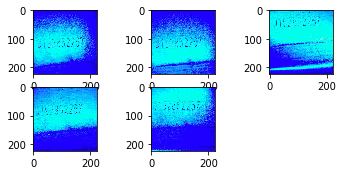

In [22]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 19 14:39:38 2017
@author: neusoft
"""
# ############################
# #使用keras 数据增强处理的验证 试验

import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image as imageGenerator
import glob

CUR_PATH = 'E:\Train picture'

SAVE_PATH = 'E:\Train picture\keras'

GENERATORCOUNTER = 5

GEN_PATH = 'E:\Train picture\keras'

# ############################
# # fill_mode 填充模式(constant,nearest默认,reflect,wrap)
# # 当设置为constant时 还有一个可选参数cval 代表使用某个固定数值的颜色来进行填充
# # datagen = imageGenerator.ImageDataGenerator(fill_mode='wrap', zoom_range=[4, 4])

# ############################
# # featurewise 处理后 视觉上图像会稍微变暗
def gen_featurewise(icount=GENERATORCOUNTER):
    datagen = imageGenerator.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
    
    print('generator ...')
    
    # #save_prefix 保存的文件的前缀 在save_to_dir被指定后有效
    # #前提 图像文件必须放到CUR_PATH下的子目录下 
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    print(gen_data)
    # #生成x张图
    for i in range(icount):
        gen_data.next()


# ############################
# # samplewise 处理后 视觉上图像会变成 类x光机图像形式
def gen_samplewise(icount=GENERATORCOUNTER):
    datagen = imageGenerator.ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)
    
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# ############################
# #zca_whtening zca白化处理 视觉上图像会变成 灰白图像
def gen_whtening(icount=GENERATORCOUNTER):
    datagen = imageGenerator.ImageDataGenerator(zca_whitening=True)
    
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# ############################
# # rotation range 随机旋转图像 在 [0, 指定角度] 范围内进行随机角度旋转
def gen_rotation(icount=GENERATORCOUNTER,rotation_range=30):
    datagen = imageGenerator.ImageDataGenerator(rotation_range=30)
    
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# ############################
# # width_shift_range & height_shift_range 水平平移,垂直平移,平移距离在[0,最大平移距离]区间内
# # 尽量不要设置太大的数值
def gen_shiftrange(icount=GENERATORCOUNTER):
    datagen = imageGenerator.ImageDataGenerator(width_shift_range=0.5,height_shift_range=0.5)

    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# ############################
# # shear_range 错切变换 就是某个坐标不变 另一个坐标按比例平移
def gen_shearrange(icount=GENERATORCOUNTER,shear_range=0.5):
    datagen = imageGenerator.ImageDataGenerator(shear_range)

    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# ############################
# # zoom_range 让图片在长或宽的方向进行放大 [zoom_range] 或[width_zoom_range, height_zoom_range]
def gen_zoom(icount=GENERATORCOUNTER,zoom_range=0.5):
    datagen = imageGenerator.ImageDataGenerator(zoom_range)
    
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# ############################
# # channel_shift_range 改变图片的整体的颜色 但并不能单独改变图片某一元素的颜色，如黑色小狗不能变成白色小狗
def gen_channelshift(icount=GENERATORCOUNTER):
    datagen = imageGenerator.ImageDataGenerator(channel_shift_range=10)
    
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# ############################
# # horizontal_flip 随机对图片执行水平翻转操作 不一定对所有图片都会执行水平翻转
def gen_horizontalflip(icount=GENERATORCOUNTER):
    datagen = imageGenerator.ImageDataGenerator(horizontal_flip=True)
    
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# # vertical_flip 随机对图片执行上下翻转操作 不一定对所有图片都会执行上下翻转
def gen_verticalflip(icount=GENERATORCOUNTER):
    datagen = imageGenerator.ImageDataGenerator(vertical_flip=True)
    
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()

# ############################
# # rescale 对图片的每个像素值均乘上这个放缩因子，这个操作在所有其它变换操作之前执行  用肉眼看是没有任何区别的
def gen_rescale(icount=GENERATORCOUNTER):
    datagen = imageGenerator.ImageDataGenerator(rescale= 1/255, width_shift_range=0.1)
    
    gen_data = datagen.flow_from_directory(CUR_PATH,
                                       batch_size=1,
                                       shuffle=False,
                                       save_to_dir=SAVE_PATH,
                                       save_prefix='gen',
                                       save_format='jpeg',
                                       target_size=(224, 224))
    # #生成x张图
    for i in range(icount):
        gen_data.next()


# ############################
# # 
print('start ...')
# #gen_featurewise()
print('end ...')

# #gen_samplewise()

# #gen_whtening()

# #gen_rotation(GENERATORCOUNTER,190)

# #可用
# #gen_shiftrange()
# #可用
# #gen_shearrange(GENERATORCOUNTER,0.2)

gen_zoom(GENERATORCOUNTER,0.2)

# #gen_channelshift()

# #gen_horizontalflip()

# #gen_verticalflip()

# #gen_rescale()

# #找到本地生成图，把所有图打印到同一张figure上
name_list = glob.glob(GEN_PATH+'/*')
fig = plt.figure()

for i in range(len(name_list)):
    img = Image.open(name_list[i])
    sub_img = fig.add_subplot(331 + i)
    sub_img.imshow(img)

# #plt.pause(30)

plt.show()

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 19 22:17:51 2017
@author: neusoft
"""

# ############################
# #使用skimage 数据增强处理的验证 试验

from skimage import io,transform
from skimage import color,data_dir,data
from skimage import exposure,img_as_float

import numpy as np
import os

CUR_PATH = 'E:\Train picture'

SAVE_PATH = 'E:\Train picture\skimage'

GEN_PATH = 'E:\Train picture\skimage'

# ############################
# # resize
# RESIZE_HEIGHT = 256
# RESIZE_WEIGHT = 256

# # x-image resize
RESIZE_HEIGHT = 64
RESIZE_WEIGHT = 64

def img_resize(imgfile):
    img = io.imread(imgfile)
    resized_image = transform.resize(img,(RESIZE_HEIGHT,RESIZE_WEIGHT))
    return resized_image

def resize_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_resize)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\rs_' + np.str(i)+'.jpg',coll[i])

# ############################
# # gray 转换成灰度图

def img_gray_resize(imgfile):
    rgb = io.imread(imgfile)
    # 将rgb图片转换成灰度图
    gray=color.rgb2gray(rgb)
    resized_image = transform.resize(gray,(RESIZE_HEIGHT,RESIZE_WEIGHT))
    # io.imshow(resized_image)
    return resized_image

def img_gray(imgfile):
    rgb = io.imread(imgfile)
    # 将rgb图片转换成灰度图
    gray=color.rgb2gray(rgb)
    return gray

def grayandresize_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg:'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_gray_resize)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\gy_rs_' + np.str(i)+'.jpg',coll[i])

def gray_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg:'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_gray)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\gy_' + np.str(i)+'.jpg',coll[i])

# ############################
# # rescale 按比例缩放

# #高宽同比例缩放1/4
RESCALE_HEIGHT_41 = 0.25
RESCALE_WEIGHT_41 = 0.25

# #高宽同比例缩放一半
RESCALE_HEIGHT_42 = 0.5
RESCALE_WEIGHT_42 = 0.5

# #高宽同比例缩放0.8倍
RESCALE_HEIGHT_43 = 0.8
RESCALE_WEIGHT_43 = 0.8

# #高宽同比例缩放2倍
RESCALE_HEIGHT_48 = 2.0
RESCALE_WEIGHT_48 = 2.0

def img_rescale41(imgfile):
    img = io.imread(imgfile)
    resized_image = transform.rescale(img,(RESCALE_HEIGHT_41,RESCALE_HEIGHT_41))
    return resized_image

def img_rescale42(imgfile):
    img = io.imread(imgfile)
    resized_image = transform.rescale(img,(RESCALE_HEIGHT_42,RESCALE_WEIGHT_42))
    return resized_image

def img_rescale43(imgfile):
    img = io.imread(imgfile)
    resized_image = transform.rescale(img,(RESCALE_HEIGHT_43,RESCALE_WEIGHT_43))
    return resized_image

def img_rescale48(imgfile):
    img = io.imread(imgfile)
    resized_image = transform.rescale(img,(RESCALE_HEIGHT_48,RESCALE_WEIGHT_48))
    return resized_image

# #rescaleflag = 1 缩放1/4,2 缩放一半,3 缩放0.8倍,4 缩放2倍
def rescale_from_dir(imagepath,savepath,rescaleflag=2):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    if(rescaleflag == 4):
        coll = io.ImageCollection(str,load_func=img_rescale48)
    if(rescaleflag == 3):
        coll = io.ImageCollection(str,load_func=img_rescale43)
    
    if(rescaleflag == 1):
        coll = io.ImageCollection(str,load_func=img_rescale41)
    else:
        coll = io.ImageCollection(str,load_func=img_rescale42)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\rsl_' + np.str(rescaleflag)+ '_' + np.str(i)+'.jpg',coll[i])


# ############################
# # noise 随机加噪
NOISE_NUMBER = 1000

def img_noise(imgfile):
    img = io.imread(imgfile)
    height,weight,channel = img.shape
    
    #随机生成5000个椒盐噪声
    for i in range(NOISE_NUMBER):
        x = np.random.randint(0,height)
        y = np.random.randint(0,weight)
        img[x ,y ,:] = 255
    
    return img

def noise_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_noise)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\ns_' + np.str(i)+'.jpg',coll[i])

# ############################
# # flip 水平 垂直 反转图像
def img_flip_V(imgfile):
    img = io.imread(imgfile)
    vertical_flip_img = img[::-1,:,:]
    return vertical_flip_img

def img_flip_H(imgfile):
    img = io.imread(imgfile)
    horizontal_flip_img = img[:,::-1,:]
    return horizontal_flip_img

# # 垂直 反转图像
def flipV_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_flip_V)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\fv_' + np.str(i)+'.jpg',coll[i])

# # 水平 反转图像
def flipH_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_flip_H)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\fh_' + np.str(i)+'.jpg',coll[i])

# ############################
# # rotate 旋转图像 逆时针
from keras.preprocessing import image as ksimage

def ks_rotate(x, theta, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0],[0, 0, 1]])
    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = ksimage.transform_matrix_offset_center(rotation_matrix, h, w)
    x = ksimage.apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x

def img_rotate0030(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(0, 30)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

def img_rotate3060(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(30, 60)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

def img_rotate6090(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(60, 90)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

def img_rotate90140(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(90, 140)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

def img_rotate140180(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(140, 180)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

def img_rotate4000(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(-40, 0)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

def img_rotate9040(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(-90, -40)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

def img_rotate14090(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(-140, -90)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

def img_rotate180140(imgfile):
    img = io.imread(imgfile)    
    rotate_limit=(-180, -140)
    theta = np.pi / 180 * np.random.uniform(rotate_limit[0], rotate_limit[1]) #逆时针旋转角度
    #rotate_limit= 30 #自定义旋转角度
    #theta = np.pi /180 *rotate_limit #将其转换为PI
    img_rot = ks_rotate(img, theta)
    return img_rot

# #rotateflag = 1,2,3,4,5,6,7,8,9
# # 1[0,30],2[30,60],3[60,90],4[90,140],5[140,180],6[-180,-140],7[-140,-90],8[-90,-40],9[-40,0]
def rotate_from_dir(imagepath,savepath,rotateflag=2):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    if(rotateflag > 4):
            if(rotateflag == 5):
                coll = io.ImageCollection(str,load_func=img_rotate140180)
            if(rotateflag == 6):
                coll = io.ImageCollection(str,load_func=img_rotate180140)
            if(rotateflag == 7):
                coll = io.ImageCollection(str,load_func=img_rotate14090)
            if(rotateflag == 8):
                coll = io.ImageCollection(str,load_func=img_rotate9040)
            else:
                coll = io.ImageCollection(str,load_func=img_rotate4000)
    else:
        if(rotateflag == 4):
            coll = io.ImageCollection(str,load_func=img_rotate90140)
        if(rotateflag == 3):
            coll = io.ImageCollection(str,load_func=img_rotate6090)
        if(rotateflag == 1):
            coll = io.ImageCollection(str,load_func=img_rotate0030)
        else:
            coll = io.ImageCollection(str,load_func=img_rotate3060)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\rs_' + np.str(rotateflag) + '_' + np.str(i)+'.jpg',coll[i])

# ############################
# # shift 平移 图像

def ks_shift(x, wshift, hshift, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    h, w = x.shape[row_axis], x.shape[col_axis] #读取图片的高和宽
    tx = hshift * h #高偏移大小，若不偏移可设为0，若向上偏移设为正数
    ty = wshift * w #宽偏移大小，若不偏移可设为0，若向左偏移设为正数
    translation_matrix = np.array([[1, 0, tx],[0, 1, ty],[0, 0, 1]])
    transform_matrix = translation_matrix  
    x = ksimage.apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x

def img_shiftleftup(imgfile):
    img = io.imread(imgfile)
    w_limit=(0.2, 0.4)
    h_limit=(0.2, 0.4)
    wshift = np.random.uniform(w_limit[0], w_limit[1])
    hshift = np.random.uniform(h_limit[0], h_limit[1])
    #wshift = 0.1 #自定义平移尺寸
    #hshift = 0.1 #自定义平移尺寸
    img_shift = ks_shift(img, wshift, hshift)
    return img_shift

def img_shiftrightup(imgfile):
    img = io.imread(imgfile)
    w_limit=(0.4, 0.8)
    h_limit=(0.4, 0.8)
    wshift = np.random.uniform(w_limit[0], w_limit[1])
    hshift = np.random.uniform(h_limit[0], h_limit[1])
    img_shift = ks_shift(img, wshift, hshift)
    return img_shift

def img_shiftuleftdown(imgfile):
    img = io.imread(imgfile)
    w_limit=(-0.4, -0.2)
    h_limit=(-0.4, -0.2)
    wshift = np.random.uniform(w_limit[0], w_limit[1])
    hshift = np.random.uniform(h_limit[0], h_limit[1])
    img_shift = ks_shift(img, wshift, hshift)
    return img_shift

def img_shiftrightdown(imgfile):
    img = io.imread(imgfile)
    w_limit=(0.4, 0.8)
    h_limit=(-0.4, -0.8)
    wshift = np.random.uniform(w_limit[0], w_limit[1])
    hshift = np.random.uniform(h_limit[0], h_limit[1])
    img_shift = ks_shift(img, wshift, hshift)
    return img_shift

# #shiftflag = 1 leftup ,2 leftdown ,3 rightup ,4 rightdown
def shift_from_dir(imagepath,savepath,shiftflag=2):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    if(shiftflag == 4):
        coll = io.ImageCollection(str,load_func=img_shiftrightdown)
    if(shiftflag == 3):
        coll = io.ImageCollection(str,load_func=img_shiftuleftdown)
    
    if(shiftflag == 1):
        coll = io.ImageCollection(str,load_func=img_shiftleftup)
    else:
        coll = io.ImageCollection(str,load_func=img_shiftrightup)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\sf_' + np.str(shiftflag) + '_' + np.str(i)+'.jpg',coll[i])

# ############################
# # zoom 缩放 图像 保持中心不变
def ks_zoom(x, zx, zy, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    zoom_matrix = np.array([[zx, 0, 0],[0, zy, 0],[0, 0, 1]])
    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = ksimage.transform_matrix_offset_center(zoom_matrix, h, w) #保持中心坐标不改变
    x = ksimage.apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x

def img_zoom41(imgfile):
    img = io.imread(imgfile)
    zoom_range=(0.1, 0.3)
    zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
    
    #zx = 0.5
    #zy = 0.5 #自定义zoom尺寸
    img_zoom = ks_zoom(img, zx, zy)
    return img_zoom

def img_zoom42(imgfile):
    img = io.imread(imgfile)
    zoom_range=(0.4, 0.6)
    zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
    img_zoom = ks_zoom(img, zx, zy)
    return img_zoom

def img_zoom43(imgfile):
    img = io.imread(imgfile)
    zoom_range=(0.6, 0.8)
    zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
    img_zoom = ks_zoom(img, zx, zy)
    return img_zoom

def img_zoom48(imgfile):
    img = io.imread(imgfile)
    zoom_range=(1.5, 2)
    zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
    img_zoom = ks_zoom(img, zx, zy)
    return img_zoom

# #zoomflag = 1 缩0.2 ,2 缩0.5 ,3 缩0.8 ,4 缩2倍
def zoom_from_dir(imagepath,savepath,zoomflag=2):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    if(zoomflag == 4):
        coll = io.ImageCollection(str,load_func=img_zoom48)
    if(zoomflag == 3):
        coll = io.ImageCollection(str,load_func=img_zoom43)
    
    if(zoomflag == 1):
        coll = io.ImageCollection(str,load_func=img_zoom41)
    else:
        coll = io.ImageCollection(str,load_func=img_zoom42)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\zm_'+ np.str(zoomflag) + '_' + np.str(i)+'.jpg',coll[i])

# ############################
# # gaussian zoom 高斯缩放 图像(金字塔图像)
def img_gaussian_zoom(imgfile):
    img = io.imread(imgfile)
    rows, cols, dim = img.shape # 获取图片的行数 列数和通道数
    # #产生高斯金字塔图像
    # #共生成了log(512)=9幅金字塔图像，加上原始图像共10幅，pyramid[0]-pyramid[1]
    img_pyramid=tuple(transform.pyramid_gaussian(img, downscale=2))
    return img_pyramid[1]

def gaussianzoom_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_gaussian_zoom)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\gsz_' + np.str(i)+'.jpg',coll[i])


# ############################
# # shear 剪切 图像
def ks_shear(x, shear, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    shear_matrix = np.array([[1, -np.sin(shear), 0],[0, np.cos(shear), 0],[0, 0, 1]])
    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = ksimage.transform_matrix_offset_center(shear_matrix, h, w)
    x = ksimage.apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x

def img_shear41(imgfile):
    img = io.imread(imgfile)
    intensity = 0.2
    sh = np.random.uniform(-intensity, intensity) #逆时针方向剪切强度为正
    img_shear = ks_shear(img, sh)
    return img_shear

def img_shear42(imgfile):
    img = io.imread(imgfile)
    intensity = 0.5
    sh = np.random.uniform(0, intensity) #逆时针方向剪切强度为正
    img_shear = ks_shear(img, sh)
    return img_shear

def img_shear43(imgfile):
    img = io.imread(imgfile)
    intensity = 0.8
    sh = np.random.uniform(0.5, intensity) #逆时针方向剪切强度为正
    img_shear = ks_shear(img, sh)
    return img_shear

# #shearflag = 1 缩0.2 ,2 缩0.5 ,3 缩0.8
def shear_from_dir(imagepath,savepath,shearflag=2):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    if(shearflag == 3):
        coll = io.ImageCollection(str,load_func=img_shear43)
    if(shearflag == 1):
        coll = io.ImageCollection(str,load_func=img_shear41)
    else:
        coll = io.ImageCollection(str,load_func=img_zoom42)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\sr_'+ np.str(shearflag) + '_' + np.str(i)+'.jpg',coll[i])

# ############################
# # contrast 对比度变换 图像增加光照变化
def randomHueSaturationValue(image, hue_shift_limit=(-180, 180),sat_shift_limit=(-255, 255),val_shift_limit=(-255, 255), u=0.5):
    if np.random.random() < u:
        img = color.rgb2hsv(image)
        h, s ,v = img[:,:,0],img[:,:,1],img[:,:,2]
        hue_shift = np.random.uniform(hue_shift_limit[0], hue_shift_limit[1])
        
        h = h + hue_shift
        
        sat_shift = np.random.uniform(sat_shift_limit[0], sat_shift_limit[1])
        s = s + sat_shift
        
        val_shift = np.random.uniform(val_shift_limit[0], val_shift_limit[1])
        v = v + val_shift
        
        img[:,:,0],img[:,:,1],img[:,:,2] = h, s ,v
        
        image = color.hsv2rgb(img)
    return image

def img_contrast(imgfile):
    img = io.imread(imgfile)
    contrast_img = randomHueSaturationValue(img)
    return contrast_img

def contrast_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_contrast)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\ct_' + np.str(i)+'.jpg',coll[i])

# ############################
# # channelshift 随机通道偏移 图像
def random_channel_shift(x, intensity, channel_index=0):
    x = np.rollaxis(x, channel_index, 0)
    min_x, max_x = np.min(x), np.max(x)
    channel_images = [np.clip(x_channel + np.random.uniform(-intensity, intensity), min_x, max_x)
                      for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_index+1)
    return x

def img_channelshift(imgfile):
    img = io.imread(imgfile)
    intensity = 0.05
    img_chsh = random_channel_shift(img, intensity)
    return img_chsh

def channelshift_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_channelshift)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\clst_' + np.str(i)+'.jpg',coll[i])


# ############################
# # PCA 白化 图像
def RGB_PCA(images):
    pixels = images.reshape(-1, images.shape[-1])
    idx = np.random.random_integers(0, pixels.shape[0], len(pixels))
    pixels = [pixels[i] for i in idx]
    pixels = np.array(pixels, dtype=np.uint8).T
    m = np.mean(pixels)/256.
    C = np.cov(pixels)/(256.*256.)
    l, v = np.linalg.eig(C)
    return l, v, m

def RGB_variations(image, eig_val, eig_vec):
    a = np.random.randn(3)
    v = np.array([a[0]*eig_val[0], a[1]*eig_val[1], a[2]*eig_val[2]])
    variation = np.dot(eig_vec, v)
    return image + variation

def img_pca(imgfile):
    img = io.imread(imgfile)
    l,v,m = RGB_PCA(img)
    img_pca = RGB_variations(img,l,v)
    return img_pca

def pca_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_pca)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\pca_' + np.str(i)+'.jpg',coll[i])

# ############################
# # 图像调暗
def img_brightness_low(imgfile):
    img = io.imread(imgfile)
    image = img_as_float(img)
    img_gam = exposure.adjust_gamma(image, 2) #调暗
    return img_gam

def lowbrightness_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_brightness_low)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\bnl_' + np.str(i)+'.jpg',coll[i])

# ############################
# # 图像调亮
def img_brightness_high(imgfile):
    img = io.imread(imgfile)
    image = img_as_float(img)
    img_gam = exposure.adjust_gamma(image, 0.5) #调亮
    return img_gam

def highbrightness_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_brightness_high)
    
    # 循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\bnh_' + np.str(i)+'.jpg',coll[i])

# ############################
# # 图像极坐标变换
from PIL import Image
import scipy.misc
import cv2

# ##最邻近插值算法
def interpolate_adjacent(src, ri, rf, rc, ti, tf, tc):
    r = 0
    t = 0
    if (ri - rf) > (rc - ri):
        r = rc
    else:
        r = rf
    if (ti - tf) > (tc - ti):
        t = tc
    else:
        t = tf
    out = src[r][t]
    return out

###双线性插值
def interpolate_bilinear(src, ri, rf, rc, ti, tf, tc):
    if rf == rc & tc == tf:
        out = src[rc][tc]
    elif rf == rc:
        out = (ti - tf)*src[rf][tc] + (tc - ti)*src[rf][tf]
    elif tf == tc:
        out = (ri - rf)*src[rc][tf] + (rc - ri)*src[rf][tf]
    else:
        inter_r1 = (ti - tf)*src[rf][tc] + (tc - ti)*src[rf][tf]
        inter_r2 = (ti - tf)*src[rc][tc] + (tc - ti)*src[rc][tf]
        out = (ri - rf)*inter_r2 + (rc - ri)*inter_r1
    return out  

####三次卷积算法
def interpolate_bitriple(src, ri, rf, rc, ti, tf, tc, rows, cols):
    rf_1 = rf - 1
    rc_1 = rc + 1
    tf_1 = tf - 1
    tc_1 = tc + 1
    
    if rf_1 < 0:
        rf_1 = 0
    if rc_1 > rows - 1:
        rc_1 = rows - 1
    if tf_1 < 0:
        tf_1 = 0
    if tc_1 > cols - 1:
        tc_1 = cols - 1
    
    if rf == rc & tc == tf:
        out = src[rc][tc]
    elif tf == tc:
        A = np.array([(4 - 8*(ri - rf + 1) + 5*np.power(ri - rf + 1, 2) - np.power(ri - rf + 1, 3)),
                      (1 - 2*np.power((ri - rf), 2) + np.power((ri - rf), 3)),
                      (1 - 2*np.power((rc - ri), 2) + np.power((rc - ri), 3)),
                      (4 - 8*(rc - ri + 1) + 5*np.power(rc - ri + 1, 2) - np.power(rc - ri + 1, 3))])
        B = np.array([[src[rf_1][tf]],[src[rf][tf]],[src[rc][tc]],[src[rc_1][tc]]])
        out = np.dot(A, B)
    elif rf == rc:
        B = np.array(src[rf][tf_1],   src[rf][tf],   src[rf][tc],   src[rf][tc_1])
        C = np.array([[(4 - 8*(ti - tf + 1) + 5*np.power(ti - tf + 1, 2) - np.power(ti - tf + 1, 3))],
                      [(1 - 2*np.power((ti - tf), 2) + np.power((ti - tf), 3))],
                      [(1 - 2*np.power((tc - ti), 2) + np.power((tc - ti), 3))],
                      [(4 - 8*(tc - ti + 1) + 5*np.power(tc - ti + 1, 2) - np.power(tc - ti + 1, 3))]])
        out = np.dot(B, C)
    else:  
        A = np.array([(4 - 8*(ri - rf + 1) + 5*np.power(ri - rf + 1, 2) - np.power(ri - rf + 1, 3)),
                      (1 - 2*np.power((ri - rf), 2) + np.power((ri - rf), 3)),
                      (1 - 2*np.power((rc - ri), 2) + np.power((rc - ri), 3)),
                      (4 - 8*(rc - ri + 1) + 5*np.power(rc - ri + 1, 2) - np.power(rc - ri + 1, 3))])

        B = np.array([[src[rf_1][tf_1], src[rf_1][tf], src[rf_1][tc], src[rf_1][tc_1]],
                      [src[rf][tf_1],   src[rf][tf],   src[rf][tc],   src[rf][tc_1]],
                      [src[rc][tf_1],   src[rc][tf],   src[rc][tc],   src[rc][tc_1]],
                      [src[rc_1][tf_1], src[rc_1][tf], src[rc_1][tc], src[rc_1][tc_1]]])

        C = np.array([[(4 - 8*(ti - tf + 1) + 5*np.power(ti - tf + 1, 2) - np.power(ti - tf + 1, 3))],
                      [(1 - 2*np.power((ti - tf), 2) + np.power((ti - tf), 3))],
                      [(1 - 2*np.power((tc - ti), 2) + np.power((tc - ti), 3))],
                      [(4 - 8*(tc - ti + 1) + 5*np.power(tc - ti + 1, 2) - np.power(tc - ti + 1, 3))]])
        out = np.dot(np.dot(A, B), C)
    return out  

# #输入参数src: 源图像矩阵（方图，笛卡尔坐标）
# #输入参数d: 目标图像直径
# #返回：dst：目标图像矩阵（圆图，极坐标）
def polar_transform(src, d):
    # #初始换目标图像矩阵
    dst = np.zeros((d, d), dtype=np.float)
    # #dst = np.zeros((d, d))
    rows, cols, dim = src.shape # 获取图片的行数 列数和通道数
    # rows, cols = src.shape
    
    line_len = rows
    line_num = cols
    
    # #径向步长
    delta_r = line_len/((d - 1)/2.0)
    
    # #切向（旋转角度）步长  
    delta_t = 2.0*np.pi/line_num
    ox = (d - 1)/2.0
    oy = (d - 1)/2.0
    
    for i in range(0, d, 1):
        for j in range(0, d, 1):
            rx = j - ox
            ry = i - oy
            r = np.sqrt(np.power(rx, 2) + np.power(ry, 2))
            
            if (r <= (d - 1)/2.0):              
                t = np.arctan2(ry, rx)
                if t < 0:
                    t = t + 2.0*np.pi
                    
                ri = r*delta_r
                rf = np.int_(np.floor(ri))
                rc = np.int_(np.ceil(ri))
                
                if rf < 0:
                    rf = 0
                if rc > rows - 1:
                    rc = rows - 1
                
                ti = t/delta_t
                tf = np.int_(np.floor(ti))
                tc = np.int_(np.ceil(ti))
                
                if tf < 0:
                    tf = 0
                if tc > cols - 1:
                    tc = cols - 1
                
                # #选择相应的插值算法
                dst[i][j],val,temp = interpolate_adjacent(src, ri, rf, rc, ti, tf, tc)
                # dst[i][j] = interpolate_bilinear(src, ri, rf, rc, ti, tf, tc)
                # dst[i][j] = interpolate_bitriple(src, ri, rf, rc, ti, tf, tc, rows, cols)
    
    return dst

# #输入参数src: 源图像矩阵（方图，笛卡尔坐标）
# #输入参数d: 目标图像直径
# #返回：dst：目标图像矩阵（圆图，极坐标）
def polar3_transform(src, d):
    shape = src.shape
    
    # #初始化 目标图像矩阵
    dst = np.zeros(shape)
    cols = width = shape[1] # 获取图片的列数 也就是宽
    rows = height = shape[0] # 获取图片的行数 也就是高
    # lens = len(shape)
  
    line_len = height # rows
    line_num = width # cols
    
    # #径向步长
    delta_r = line_len/((d - 1)/2.0)
    
    # #切向（旋转角度）步长  
    delta_t = 2.0*np.pi/line_num
    ox = (d - 1)/2.0
    oy = (d - 1)/2.0
    
    for i in range(0, d, 1):
        for j in range(0, d, 1):
            rx = j - ox
            ry = i - oy
            r = np.sqrt(np.power(rx, 2) + np.power(ry, 2))
            
            if (r <= (d - 1)/2.0):              
                t = np.arctan2(ry, rx)
                if t < 0:
                    t = t + 2.0*np.pi
                    
                ri = r*delta_r
                rf = np.int_(np.floor(ri))
                rc = np.int_(np.ceil(ri))
                
                if rf < 0:
                    rf = 0
                if rc > rows - 1:
                    rc = rows - 1
                
                ti = t/delta_t
                tf = np.int_(np.floor(ti))
                tc = np.int_(np.ceil(ti))
                
                if tf < 0:
                    tf = 0
                if tc > cols - 1:
                    tc = cols - 1
                
                # #选择相应的插值算法
                dst[i][j][0],val,temp = interpolate_adjacent(src, ri, rf, rc, ti, tf, tc)
                dst[i][j][1] = val
                dst[i][j][2] = temp
                # interpolate_bilinear(src, ri, rf, rc, ti, tf, tc)
                # dst[i][j][0],val,temp = interpolate_bilinear(src, ri, rf, rc, ti, tf, tc)
                # dst[i][j][1] = val
                # dst[i][j][2] = temp
                # interpolate_bitriple(src, ri, rf, rc, ti, tf, tc, rows, cols)
                # dst[i][j][0],val,temp = interpolate_bitriple(src, ri, rf, rc, ti, tf, tc, rows, cols)
                # dst[i][j][1] = val
                # dst[i][j][2] = temp
    
    return dst

def img_polar(imgfile):
    img = io.imread(imgfile)
    rows, cols, dim = img.shape # 获取图片的行数(高) 列数(宽)和通道数
    # img_p = polar_transform(img, rows)
    img_p = polar3_transform(img, rows)
    return img_p
    #width = cols
    #height = rows
    #im = Image.new('RGB',(width, height),(255,255,255))
    #for w in range(width):
    #    for h in range(height):
    #        try:
    #            im.putpixel((w,h),tuple(img_p[h][w]))
    #        except:
    #            #im.putpixel((w,h),tuple(img_p[h][w],)*3)
    #            im.putpixel((w,h),255)
    #return im

def polar1_from_dir(imagepath,savepath):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    coll = io.ImageCollection(str,load_func=img_polar)
    # io.imshow(coll[0])
    
    # ok ok
    # scipy.misc.toimage(coll[0], cmin=0.0, cmax=255).save('outfile.jpg')
    # scipy.misc.toimage(coll[0], mode='P').save('outfile.jpg')
    # scipy.misc.toimage(coll[0]).save('outfile.jpg')

    # output = scipy.misc.toimage(coll[0])
    # output.convert('RGBA')
    # scipy.misc.toimage(output).save('outfile.jpg')
   
    # error
    # imgp = Image.fromarray(coll[0])
    # imgp.save('outfile.jpeg')
    
    # ok ok 但是灰色图
    # cv2.imwrite("filename.jpg", coll[0])
    
    # error 
    # matplotlib.image.imsave('name.png', coll[0])
    
    # 循环保存图片
    for i in range(len(coll)):
    #    imgp = Image.fromarray(coll[i])
    #    error
    #    io.imsave(savepath + '\\plr1_' + np.str(i)+'.jpg',coll[i])
        img_name = savepath + '\\plr1_' + np.str(i)+'.jpg'
        scipy.misc.toimage(coll[i]).save(img_name)



# ############################
# #另一种极坐标转换方法
# #
import math

def to_gray(img):
    w, h,_ = img.shape
    ret = np.empty((w, h), dtype=np.uint8)
    retf = np.empty((w, h), dtype=np.float)
    imgf = img.astype(float)
    retf[:, :] = ((imgf[:, :, 1] + imgf[:, :, 2] + imgf[:, :, 0])/3)
    ret = retf.astype(np.uint8)
    return ret

def radia_transform(im,w,h):
    shape = im.shape

    new_im = np.zeros(shape)
    # print(shape)
    # print(len(shape))
    # print('w',w)
    # print('h',h)
    width = shape[1]
    height = shape[0]
    lens = len(shape)
    for i in range(0,width):
        xita = 2*3.14159*i/width
        for a in range(0,height):
            x = (int)(math.floor(a * math.cos(xita)))
            y = (int)(math.floor(a * math.sin(xita)))
            new_y = (int)(h+x)
            new_x = (int)(w+y)
            # print(h.dtype)
            if new_x>=0 and new_x<width:
                if new_y>=0 and new_y<height:
                    if lens==3:
                        new_im[a,i,0] = (im[new_y,new_x,0]-127.5)/128
                        new_im[a,i,1] = (im[new_y,new_x,1]-127.5)/128
                        new_im[a,i,2] = (im[new_y,new_x,2]-127.5)/128
                    else:
                        new_im[a,i] = (im[new_y,new_x]-127.5)/128
                        new_im[a,i] = (im[new_y,new_x]-127.5)/128
                        new_im[a,i] = (im[new_y,new_x]-127.5)/128
    return new_im

def img_polar2_1(imgfile):
    img = io.imread(imgfile)
    # img = to_gray(img)
    rows, cols, dim = img.shape # 获取图片的行数(高) 列数(宽)和通道数
    img_p = radia_transform(img, int(cols/10), int(rows))
    # img_p = radia_transform(img, int(cols/10), int(rows/4*3))
    # img_p = radia_transform(img, int(cols/2), int(rows/4*3))
    # img_p = radia_transform(img, int(cols/2), int(rows/2))
    # img_p = radia_transform(img, int(cols/4), int(rows/4))
    # img_p = radia_transform(img, int(cols/4*3), int(rows/4*3))
    # img_p = radia_transform(img, int(cols), int(rows/4*3))
    
    return img_p

def img_polar2_2(imgfile):
    img = io.imread(imgfile)
    # img = to_gray(img)
    rows, cols, dim = img.shape # 获取图片的行数(高) 列数(宽)和通道数
    img_p = radia_transform(img, int(cols/10), int(rows/4*3))
    return img_p

def img_polar2_3(imgfile):
    img = io.imread(imgfile)
    # img = to_gray(img)
    rows, cols, dim = img.shape # 获取图片的行数(高) 列数(宽)和通道数
    img_p = radia_transform(img, int(cols/2), int(rows/4*3))
    return img_p

def img_polar2_4(imgfile):
    img = io.imread(imgfile)
    # img = to_gray(img)
    rows, cols, dim = img.shape # 获取图片的行数(高) 列数(宽)和通道数
    img_p = radia_transform(img, int(cols/2), int(rows/2))
    return img_p

def img_polar2_5(imgfile):
    img = io.imread(imgfile)
    # img = to_gray(img)
    rows, cols, dim = img.shape # 获取图片的行数(高) 列数(宽)和通道数
    img_p = radia_transform(img, int(cols/4), int(rows/4))
    return img_p

def img_polar2_6(imgfile):
    img = io.imread(imgfile)
    # img = to_gray(img)
    rows, cols, dim = img.shape # 获取图片的行数(高) 列数(宽)和通道数
    img_p = radia_transform(img, int(cols/4*3), int(rows/4*3))
    return img_p

def img_polar2_7(imgfile):
    img = io.imread(imgfile)
    # img = to_gray(img)
    rows, cols, dim = img.shape # 获取图片的行数(高) 列数(宽)和通道数
    img_p = radia_transform(img, int(cols), int(rows/4*3))
    return img_p

def polar2_from_dir(imagepath,savepath,flag=1):
    # str=imagepath+'\\*.jpg'+':'+imagepath+'\\*.png'
    str=imagepath+'\\*.jpg'
    
    if(flag == 1):
        coll = io.ImageCollection(str,load_func=img_polar2_1)
    if(flag == 2):
        coll = io.ImageCollection(str,load_func=img_polar2_2)
    if(flag == 3):
        coll = io.ImageCollection(str,load_func=img_polar2_3)
    if(flag == 4):
        coll = io.ImageCollection(str,load_func=img_polar2_4)
    if(flag == 5):
        coll = io.ImageCollection(str,load_func=img_polar2_5)
    if(flag == 6):
        coll = io.ImageCollection(str,load_func=img_polar2_6)
    if(flag == 7):
        coll = io.ImageCollection(str,load_func=img_polar2_7)
    else:
        coll = io.ImageCollection(str,load_func=img_polar2_1)
    
    # scipy.misc.toimage(coll[0]).save('outfile.jpg')
    # #循环保存图片
    for i in range(len(coll)):
        io.imsave(savepath + '\\plr2_' + np.str(i)+'.jpg',coll[i])


# ############################
# # test
#curpath = os.getcwd()
#print(curpath)
    
# #resize 同比例的大小
# #resize_from_dir('./x-image2','./x-gen')

# #灰化处理
# gray_from_dir('./x-image2','./x-gen')

# #按比例缩放
# rescale_from_dir('./x-image2','./x-gen',1)

# #加噪音
# noise_from_dir('./x-image2','./x-gen')

# #反转 水平 垂直
# flipV_from_dir('./x-image2','./x-gen')
# flipH_from_dir('./x-image2','./x-gen')

# #旋转
# rotate_from_dir('./x-image2','./x-gen',2)

# #平移
# shift_from_dir('./x-image2','./x-gen',2)

# #缩放
# zoom_from_dir('./x-image2','./x-gen',2)
# #高斯缩放
# gaussianzoom_from_dir('./x-image2','./x-gen')

# #对比度变换
# contrast_from_dir('./x-image2','./x-gen')

# #pca白化 error
# pca_from_dir('./x-image2','./x-gen')

# #图像调暗
# lowbrightness_from_dir('./x-image2','./x-gen')
# #图像调亮
# highbrightness_from_dir('./x-image2','./x-gen')

# #图像的极坐标变换
# #polar_from_dir('./x-image2','./x-gen')


# ############################
# # 对x光机图像的增强处理

# #首先resize 同样大小的图像 64x64
# resize_from_dir('./x-image2/pingping','./x-gen')

# #按比例缩放
# rescale_from_dir('./x-gen','./x-pingping-gen',1)
# rescale_from_dir('./x-gen','./x-pingping-gen',2)

# #加噪音
# noise_from_dir('./x-gen','./x-pingping-gen')

# #反转 水平 垂直
# flipV_from_dir('./x-gen','./x-pingping-gen')
# flipH_from_dir('./x-gen','./x-pingping-gen')

# #旋转
# rotate_from_dir('./x-gen','./x-pingping-gen',2)
# rotate_from_dir('./x-gen','./x-pingping-gen',4)
# rotate_from_dir('./x-gen','./x-pingping-gen',6)
# rotate_from_dir('./x-gen','./x-pingping-gen',8)

# #平移
# shift_from_dir('./x-gen','./x-pingping-gen',2)
# shift_from_dir('./x-gen','./x-pingping-gen',3)

# #缩放
# zoom_from_dir('./x-gen','./x-pingping-gen',2)

# #高斯缩放
# gaussianzoom_from_dir('./x-gen','./x-pingping-gen')

# #图像的极坐标变换
polar1_from_dir('./x-gen','./x-pingping-gen')
# #polar2_from_dir('./x-gen','./x-pingping-gen',2)

In [ ]:
#样本处理


In [ ]:
#训练图片库

In [ ]:
#识别